In [680]:
#########################################
#            Inpainting                 #
#                                       #
# Grenoble INP - Phelma                 #
# SICOM                                 #
#                                       #
# Edna FRICKE                           #
# Henrique LEFUNDES DA SILVA            #
#                                       #
# 27/11/2023                            #
#########################################

In [681]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.color as color
from scipy.signal import convolve2d
from skimage import img_as_float

In [682]:
def process_image(path, show = True):
    # Load image
    img = io.imread(path)
    # Convert to grayscale
    img = color.rgb2gray(img)
    # Convert to float
    img = img_as_float(img)

    if show:
        plt.imshow(img, cmap='gray')

    return img

def inpainting(modified_img, original_img, i = 1, j = 10, threshold = 0.05):
    ''' 
    Restore the image using the inpainting technique.
    The inpainting technique consists in replacing the black pixels
    with the average of the pixels around it.

    Parameters
    ----------
    img : ndarray
        The modified image. (with the black pixels)
    original_img : ndarray
        The original image. (without the black pixels)
    i : int
        The number of lines of the filter. (default is 1)
    j : int
        The number of columns of the filter. (default is 10)
    threshold : float
        The threshold to create the mask. (default is 0.05)
    '''
    # Create a copy of the original image
    inpainted = original_img.copy()

    # Create the filter
    filter = np.ones((i, j)) / (i * j)

    # Convolve the image with the filter
    convolved = convolve2d(modified_img, filter, mode='same', boundary='wrap')

    # Create the mask matrix
    mask = np.zeros(modified_img.shape)
    
    # Put 1 where the picture is not black
    mask[modified_img > threshold] = 1
    
    # Convolve the mask with the filter
    mask_convolved = convolve2d(mask, filter, mode='same', boundary='wrap')

    # Normalize the image
    normalized_convolved = convolved / mask_convolved

    # Replace the black pixels with the convolved pixels
    inpainted[mask == 0] = normalized_convolved[mask == 0]

    return inpainted

In [683]:
# Load image
original_img = process_image('original_picture.jpg', show = False)
# Load image
modified_img = process_image('modified_picture.jpg', show = False)

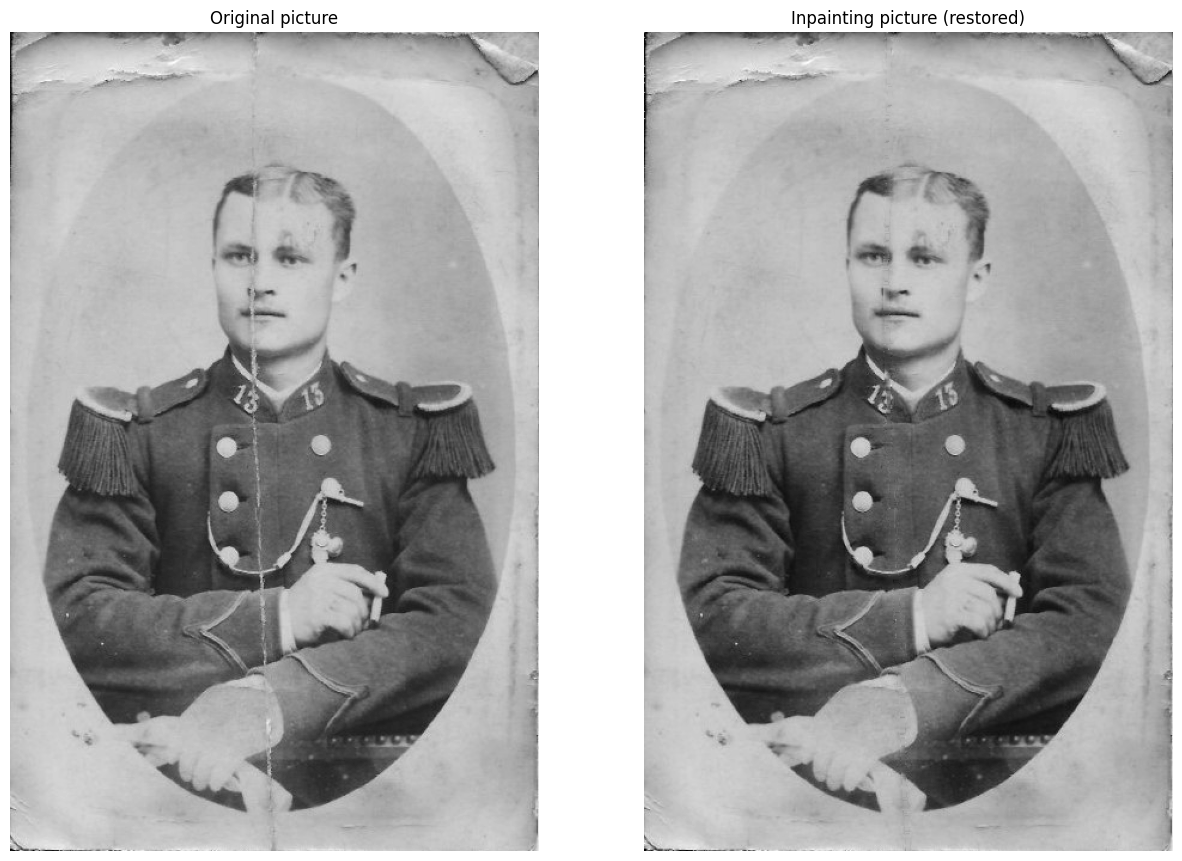

In [684]:
# The default values are i = 1, j = 10 and threshold = 0.05
# The default values were chosen because they gave the best result
# i = 1 was picked because of the format of the distorted image (vertical lines)
# j = 10 was a good value to remove the distortion
# threshold = 0.05 was a good value get the mask correctly (the mask were made in Microsoft Paint)
# because of that not all pixels are really black. Some of them are a little bit gray.

# Apply the inpainting
inpainting_picture = inpainting(modified_img, original_img)

# Show the result
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title('Original picture')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inpainting_picture, cmap='gray')
plt.title('Inpainting picture (restored)')
plt.axis('off')

plt.gcf().set_size_inches(15, 15)
plt.show()